In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math

In [3]:
import random

class Array:

    def __init__(self, size_x : int = None, size_y : int = None, data : list[list] | None = None) -> None:
        if not data:
            if not isinstance(size_x, int):
                raise TypeError(f"Expectected int type, got {type(size_x)} instead")
            if not isinstance(size_y, int):
                raise TypeError(f"Expectected int type, got {type(size_y)} instead")
        self.size_x = size_x
        self.size_y = size_y
        if size_x is None and size_y is None and data:
            self.data = data
            self.size_x = len(data)
            self.size_y = len(data[0])
        elif size_x == 0 or self.size_y == 0:
            self.data = [[]]
        elif data:
            if isinstance(data, list) and isinstance(data[0], list):
                if len(data) != size_x or len(data[0]) != size_y:
                    raise ValueError("Given sizes do not match data sizes")
                self.data = data
            else: raise TypeError("Unsupported data type")
        else:
            self.data = [[0 for j in range(size_y)] for i in range(size_x)]


    def __getitem__(self, i) -> list:
        return self.data[i]


    def __neg__(self) -> object:
        for i in range(self.size_x):
            for j in range(self.size_y):
                self[i][j] = -self[i][j]

        return self


    def len_x(self) -> int:
        return self.size_x


    def len_y(self) -> int:
        return self.size_y


    def resize(self, new_x : int, new_y : int) -> object:
        if(new_x < self.size_x) or (new_y < self.size_y):
            raise TypeError(
                f"Can't resize 2D array sized {self.size_x}x{self.size_y} to {new_x}x{new_y}")
        for i in self.data:
            for _ in range(new_y - self.size_y):
                i.append(0)

        for _ in range(new_x):
            self.data.append([0 for i in range(new_y)])

        self.size_x = new_x
        self.size_y = new_y

        return self


    def __eq__(self, __value: object) -> bool:
        return self.data == __value.data


    def __add__(self, __value : object) -> object:
        if type(self) != type(__value):
            raise TypeError(f"Can't add a 2D array to {type(__value)}")
        if (self.size_x != __value.size_x) or (self.size_y != __value.size_y):
            raise ValueError("2D arrays have diffirent size")

        for i in range(self.size_x):
            for j in range(self.size_y):
                self.data[i][j] += __value[i][j]

        return self


    def __sub__(self, __value : object) -> object:
        if type(self) != type(__value):
            raise TypeError(f"Can't subtract {type(__value)} for 2D array")
        if (self.size_x != __value.size_x) or (self.size_y != __value.size_y):
            raise ValueError("2D arrays have diffirent size")

        for i in range(self.size_x):
            for j in range(self.size_y):
                self.data[i][j] -= __value[i][j]

        return self

    def div_(self, __value : int) -> object:
        for i in range(self.size_x):
            for j in range(self.size_y):
                self[i][j] = __value / self[i][j]
        return self

    def __str__(self) -> str:
        s = ""
        for i in range(self.size_x):
            for j in range(self.size_y):
                s += f"{self[i][j]} "
                if j == self.size_y - 1 and i != self.size_x - 1:
                    s += "\n"
        return s

    def random_data(self, _min=0, _max=20) -> object:
        for i in range(self.size_x):
            for j in range(self.size_y):
                self.data[i][j] = random.randint(_min, _max)

        return self


    def abs_(self) -> object:
        for i in range(self.size_x):
            for j in range(self.size_y):
                self[i][j] = abs(self[i][j])

        return self

    def sum_(self) -> float:
        s = 0
        for i in range(self.size_x):
            for j in range(self.size_y):
                s += self[i][j]

        return s

    def transpose(self) -> object:
        new_x = self.size_y
        new_y = self.size_x

        new_list = Array(new_x, new_y)
        for i in range(new_x):
            for j in range(new_y):
                new_list.data[i][j] = self.data[j][i]

        return new_list


    def det(self) -> int:
        if self.size_x != self.size_y:
            raise ValueError(
                f"Can't count the determinant for 2D array sized {self.size_x}x{self.size_y}")
        swaps = 0
        det = 1

        for i in range(self.size_x):
            if self[i][i] == 0:
                id = i + 1
                while (id < self.size_x) and (self[id][i] == 0):
                    id += 1
                if id == self.size_x:
                    return 0
                swaps += 1
                self.data[id], self.data[i] = self[i], self[id]
            det *= self[i][i]
            inverse = 1 / self[i][i]
            for j in range(i, self.size_x):
                self[i][j] *= inverse
            for next in range(i + 1, self.size_x):
                ratio = self[next][i]
                for j in range(i, self.size_x):
                    self[next][j] -= self[i][j] * ratio

        return det if swaps % 2 == 0 else -det


    def reverse(self):
        det = self.det()
        if self.size_x == 2:
            return Array(2, 2, [[self[1][1] / det, -self[0][1] / det],
                                [-self[1][0] / det, self[0][0] / det]])


    def __truediv__(self, __value : float | object) -> object:
        if isinstance(__value, float):
            for i in range(self.size_x):
                for j in range(self.size_y):
                    self[i][j] /= __value

            return self
        elif type(__value) == type(self):
            result = Array(self.size_x, self.size_y)
            for i in range(result.size_x):
                result[i][i] = 1
            for i in range(__value.size_x):
                leading = __value[i][i]
                if leading == 0:
                    for j in range(__value.size_y):
                        __value[i][j] += 1
                        result[i][j] += 1
                if leading != 1:
                    for j in range(__value.size_y):
                        __value[i][j] /= leading
                        result[i][j] /= leading

                for k in range(__value.size_x):
                    if k != i:
                        ratio = __value[k][i]
                        for j in range(__value.size_y):
                            __value[k][j] -= ratio * __value[i][j]
                            result[k][j] -= ratio * result[i][j]

            return result * self
        else:
            raise TypeError("Only can divivde 2D array by int or 2D array")


    def _append(self, __value : list) -> object:
        new_list = Array(self.size_x, self.size_y)
        new_list.data = self.data.copy()

        if not isinstance(__value, list):
            raise TypeError(f"Expected a list, got {type(__value)} instead")
        if len(__value) != new_list.size_y:
            raise ValueError("Can't add a list to an array as they have different lenght")

        new_list.data.append(__value)
        new_list.size_x += 1

        return new_list


    def mean(self, option : int | None =None) -> float | object:
        if option is None:
            lenght = self.size_x * self.size_y
            s = 0
            for i in range(self.size_x):
                s += sum(self[i][j] for j in range(self.size_y))
            return s / lenght

        if option == 0:
            result = Array(1, self.size_y)
            for j in range(self.size_y):
                result[-1][j] = sum(self[i][j] for i in range(self.size_x)) / self.size_x
            return result

        if option == 1:
            result = Array(1, self.size_x)
            for j in range(self.size_x):
                result[-1][j] = sum(self[j][i] for i in range(self.size_y)) / self.size_y
            return result.transpose()


    def __mul__(self, __value : float | object) -> object:
        if isinstance(__value, float):
            for i in range(self.size_x):
                for j in range(self.size_y):
                    self.data[i][j] *= __value
            return self
        if type(__value) == type(self):
            if self.size_y != __value.size_x:
                raise ValueError(
                    f"Can't multiply 2D array sized {self.size_x}x{self.size_y} with 2D array sized {__value.size_x}x{__value.size_y}")
            result = Array(self.size_x, __value.size_y)
            for i in range(result.size_x):
                for j in range(result.size_y):
                    result.data[i][j] = sum(self[i][k] * __value[k][j]
                                            for k in range(__value.size_x))
            return result
        raise TypeError("Only can multiply 2D array with int or 2D array")


    def __pow__(self, n : int) -> object:
        for _ in range(n - 1):
            self *= self
        return self



    def pow_(self, __value : int) -> object:
        for i in range(self.size_x):
            for j in range(self.size_y):
                self[i][j] **= __value

        return self


    def unique(self, coloum : int):
        if not isinstance(coloum, int):
            raise TypeError("A coloum index can only be int")
        if coloum > self.size_y or coloum < 0:
            raise ValueError("Given coloum number doesn't exit in 2D array")
        unique = set()
        for i in range(self.size_x):
            unique.add(self[i][coloum])

        return unique


    def select_rows(self, indices : list) -> object:
        selected_data = [self[i] for i in indices]

        return Array(data=selected_data)


    def select_columns(self, indices: list) -> object:
        selected_data = [[row[i] for i in indices] for row in self.data]
        return Array(data=selected_data)


#a = Array(1, 2, [[2, 2]])

In [4]:
data = sns.load_dataset('iris')

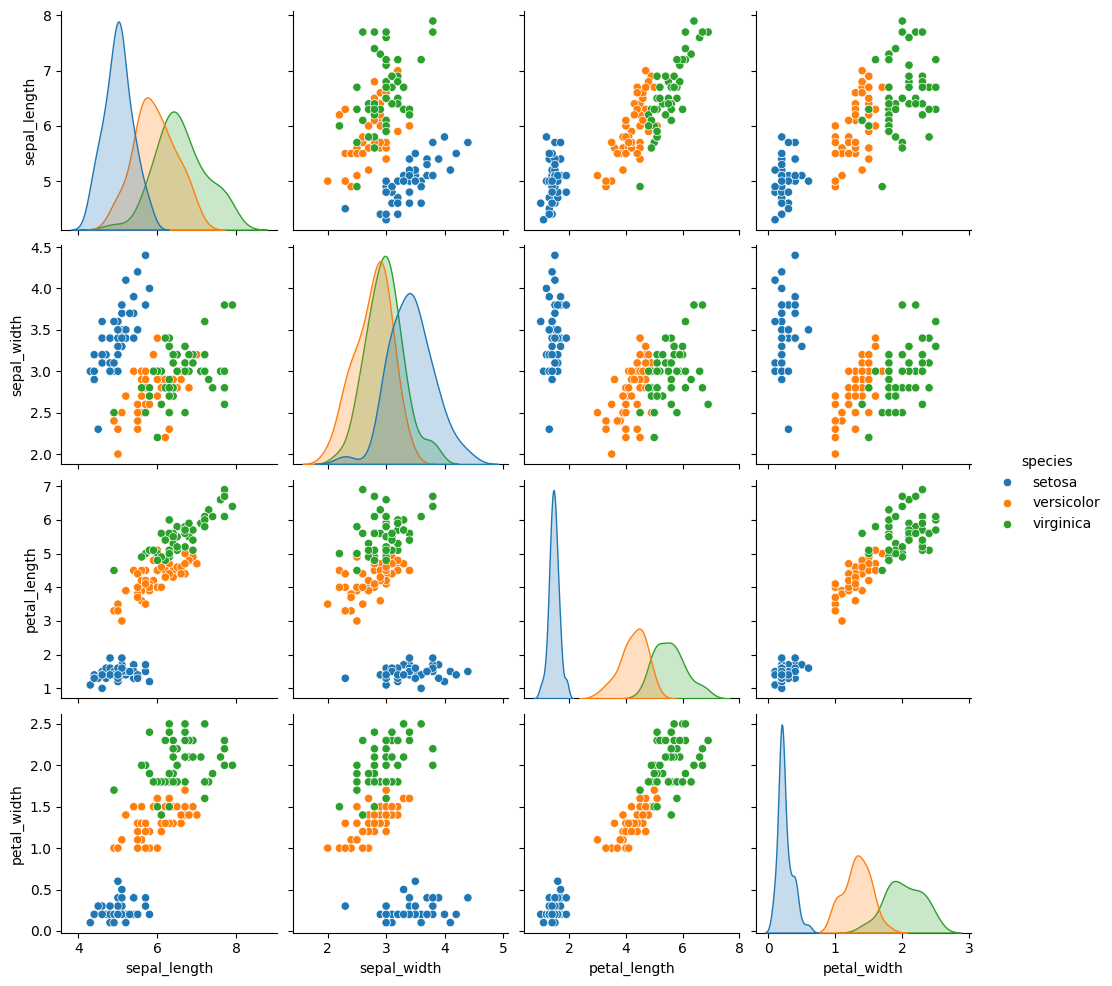

In [5]:
sns.pairplot(data=data, hue = 'species')

In [6]:
encode = {'setosa' : 0, 'versicolor' : 1, 'virginica' : 2}
data = data.replace({'species' : encode})

In [7]:
data = data.drop(['sepal_length', 'sepal_width'], axis = 1)

In [8]:
transform, head = [], []
for i in data:
  head.append(i)
  transform.append(data[i].to_list())
transformed_data = Array(data=transform)
transformed_data = transformed_data.transpose()

In [9]:
class Distance_functions:

    @staticmethod
    def euclidian_distance(a : list, b : list) -> float:
        s = 0
        for i, x in enumerate(a):
            s += (x - b[i]) ** 2
        return s

class Kernel_functions:

    @staticmethod
    def gaussinan_kernel(x : float) -> float:
        return math.exp(-x * x * 2) * ((math.pi * 2) ** -1)

    @staticmethod
    def biquadratic_kernel(x : float) -> float:
        return 0 if abs(x) > 1 else (15 * (1 - x * x ) ** 2) / 16

    @staticmethod
    def epanechnikov_kernel(x : float) -> float:
        return 0 if abs(x) > 1 else (3 * (1 - x * x) ** 2) / 4

    @staticmethod
    def triangle_kernel(x : float) -> float:
        return 0 if abs(x) > 1 else 1 - abs(x)


class Knn_base:

    def __init__(self, k : int) -> None:
      self.k = k
      self.data = None

In [10]:
class Knn(Knn_base):

    def __init__(self, k) -> None:
        super().__init__(k)


    def fit(self, data : list[list]) -> None:
        self.data = data


    def get_nn(self, point : list, dist_function) -> int:
        distances = []
        for row in self.data:
            distances.append((dist_function(row[:-1], point), row))
        distances.sort(key=lambda x: x[0])

        return [distances[i][1] for i in range(self.k)]


    def predict(self, point : list, dist_function=Distance_functions.euclidian_distance) -> int:
        neigbours = self.get_nn(point, dist_function)
        predictions = [row[-1] for row in neigbours]

        return max(set(predictions), key=predictions.count)


In [465]:
class Potential_functions(Knn_base):

    def __init__(self, k: int, h : float = 1, kernel : object = None) -> None:
        super().__init__(k)
        if kernel is None:
          self.kernel = Kernel_functions.gaussinan_kernel
        else:
          self.kernel = kernel
        self.h = h
        self.gammas = None
        self.labels_set = None


    def fit(self, data, eps : float = 0.1) -> None:
        self.data = data
        self.labels_set = set(self.data.transpose()[-1])
        self.gammas = [0 for _ in range(self.data.size_x)]
        level = 1
        while (level > eps):
            self.new_data = list(zip(data, self.gammas))
            #return
            level, mistakes = self.error_rate(1)
            i = random.choice(mistakes)
            self.gammas[i] += 1

            print(level)

        return self.gammas


    def error_rate(self, option : bool = 0) -> float:
        errors, errors_list = 0, []
        for i in range(len(self.new_data)):
            try:
              if self.predict(self.new_data[i][0][:-1], option=True) != self.data[i][-1]:
                  #print(self.predict(self.new_data[i][0][:-1]), self.data[i][-1])
                  errors += 1
                  errors_list.append(i)
            except TypeError:
              raise TypeError(f"{self.new_data[0]}\n{self.new_data[i][0]}")

        return errors / len(self.new_data) if not option else errors / len(self.new_data), errors_list


    def get_nn(self, point : list, dist_function) -> list:
        distances = []
        for row in self.new_data:
            distances.append((dist_function(row[0][:-1], point), row))
        distances.sort(key=lambda x: x[0])

        return distances


    def predict(self, point : list,
                dist_function = Distance_functions.euclidian_distance, option : bool = False) -> int:
        label_dict = {}
        labels_set = self.labels_set
        a = self.get_nn(point, dist_function)

        distances = [i[0] for i in a]
        neigbours = [i[1][0] for i in a]
        gammas = [i[1][1] for i in a]
        predictions = [row[-1] for row in neigbours]

        for i in labels_set:
            label_dict[i] = 0
        if option:
          label_dict[4] = 1e-152

        #return label_dict

        for i in range(len(predictions)):
            label_dict[predictions[i]] += gammas[i] * self.kernel(distances[i] / self.h)

        if max(label_dict.values()) != 0 :
          #print(label_dict, len(predictions))
          return max(label_dict, key=lambda x : label_dict[x])

        return 4

Мы все так же строим предсказания модели по формуле:
$$ a(u) = arg \max_{y_i \in Y} ∑_{i=1}^{k} w_i[y_u^{(i)} = y] $$
В методе потенциальных функций мы находим вес по формуле:
$$w_i = γ(i) K(\frac{ρ(u, x_u^{(i)})}{h}),$$
где $γ(i)$ - потенциал, который мы можем получить из алгоритма:


1.   $ γ = (γ_0, γ_1, ..., γ_l) = 0$
2.   while $error \space rate > ϵ$
3.   $∀ x_i \in X_l$
4.   Рандомно выберем из множества обьектов, на которых модель ошиблась, обьект $x_i$
5.   Для обьекта $x_i$ - $γ_i = γ_i + 1$ \\

Таким образом мы получили значения потенциала для каждой точки пространства признаков.





In [452]:
def make_classification_map_potential(best_model : object, data : list) -> None:
  x1, x2 = [], []
  for i in data:
    x1.append(i[0])
    x2.append(i[1])

  min_x, max_x = min(x1), max(x1)
  min_y, max_y = min(x2), max(x2)
  all_points = []
  for i in range(int(min_x * 10), int((max_x + 1) * 9)):
    for j in range(int(min_y * 10), int((max_y + 1) * 9)):
      all_points.append([i / 10, j / 10])

  y = []
  for i in all_points:
    y.append(model.predict(i, option=False))

  df = pd.DataFrame(data={'Petal-length' : [point[0] for point in all_points], 'Petal-width' : [point[1] for point in all_points], 'Species' : y})
  sns.scatterplot(data=df, x='Petal-length', y='Petal-width', hue='Species', palette="deep")
  plt.show()

In [447]:
model = Potential_functions(150, h=0.4)
#type(transformed_data)
a = model.fit(transformed_data, eps=3 / 150)

1.0
0.6666666666666666
0.3333333333333333
0.22
0.05333333333333334
0.04
0.06666666666666667
0.16666666666666666
0.02


In [432]:
x = transformed_data.transpose()[0]
y = transformed_data.transpose()[1]

In [ ]:
x[:3]

[1.4, 1.4, 1.3]

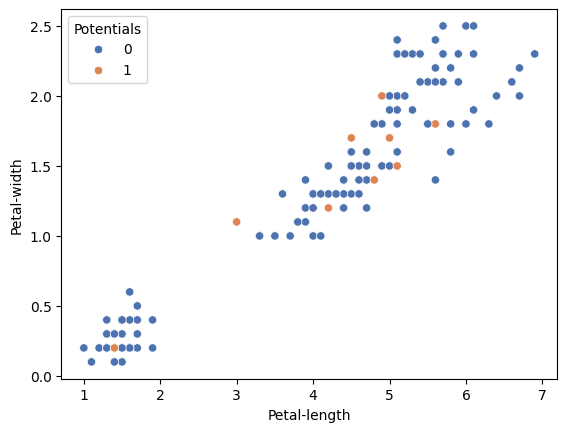

In [448]:
df = pd.DataFrame(data={'Petal-length' : x, 'Petal-width' : y, 'Potentials' : a})
sns.scatterplot(data=df, x='Petal-length', y='Petal-width', hue='Potentials', palette="deep")
plt.show()

In [31]:
data = [*transformed_data]

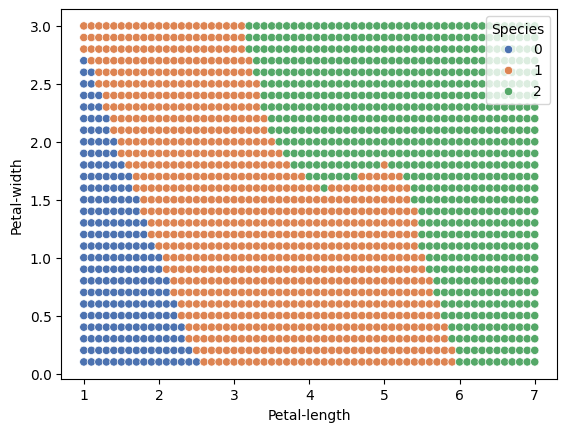

In [453]:
make_classification_map_potential(model, data)

Полученная карта классификации очень похожа на полученные ранее для предыдущих моделей. В ней не наблюдается существования мнимого класса, так как ядро Гаусса бесконечно гладкое.

In [466]:
model = Potential_functions(7, 0.4, kernel=Kernel_functions.triangle_kernel)
#type(transformed_data)
a = model.fit(transformed_data, eps=4 / 150)

1.0
0.7533333333333333
0.43333333333333335
0.2866666666666667
0.14666666666666667
0.11333333333333333
0.1
0.08666666666666667
0.05333333333333334
0.02666666666666667


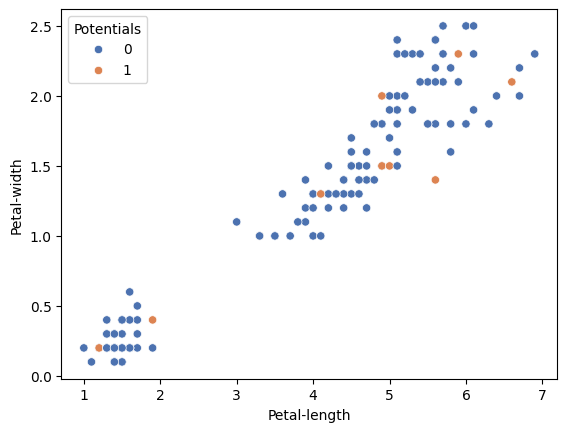

In [467]:
df = pd.DataFrame(data={'Petal-length' : x, 'Petal-width' : y, 'Potentials' : a})
sns.scatterplot(data=df, x='Petal-length', y='Petal-width', hue='Potentials', palette="deep")
plt.show()

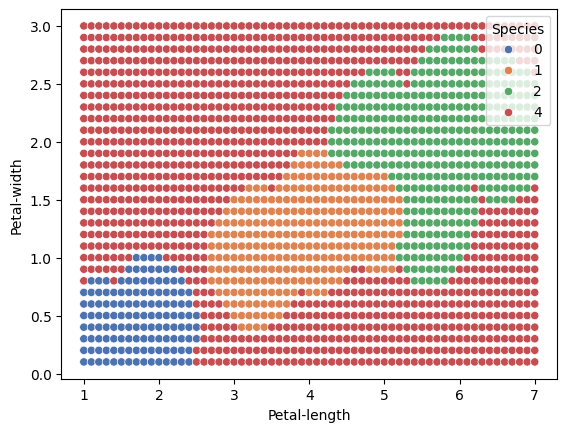

In [468]:
make_classification_map_potential(model, data)

Тут мы видим совершенно другую картину, что вполне возможно говорит о том, что алгоритм для данного датасета работает лучше, ведь если мы посмтрим на построенную выше диаграмму(pairplot), то увидим, что алгоритм делит всю плоскость точек лучше - видно, что классы примерно так же и распределены. Классификатор с таким ядром имеет меньшую обобщающую способность.

In [525]:
model = Potential_functions(6,0.4, kernel=Kernel_functions.epanechnikov_kernel)
#type(transformed_data)
a = model.fit(transformed_data, eps=4 / 150)

1.0
0.68
0.49333333333333335
0.3466666666666667
0.21333333333333335
0.10666666666666667
0.12666666666666668
0.08
0.07333333333333333
0.05333333333333334
0.06666666666666667
0.05333333333333334
0.02666666666666667


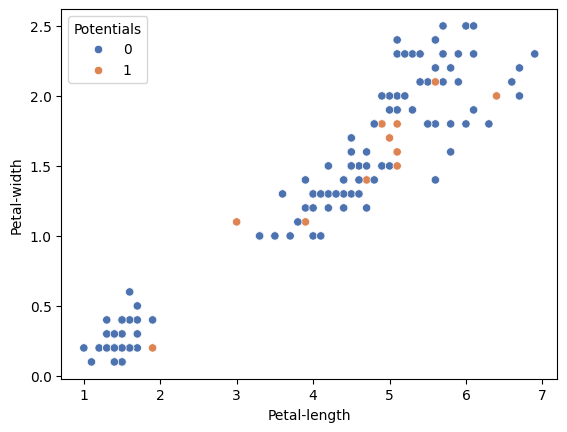

In [526]:
df = pd.DataFrame(data={'Petal-length' : x, 'Petal-width' : y, 'Potentials' : a})
sns.scatterplot(data=df, x='Petal-length', y='Petal-width', hue='Potentials', palette="deep")
plt.show()

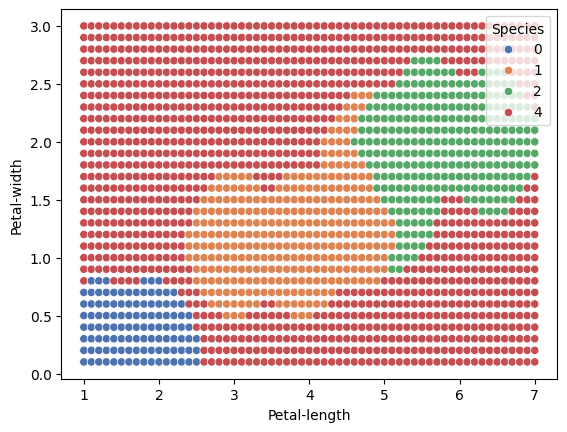

In [527]:
make_classification_map_potential(model, data)

Получаем такой же результат как и для треугольного.

In [476]:
def split(data : list, size : float = 0.3) -> tuple[object, list]:
  random.shuffle(data)
  spl = int(len(data) * (1 - size))
  return Array(data=data[:spl]), data[spl:]

In [477]:
train, test = split(data, size=0.3)

Разделим выборку 70 на 30 - потому что результат Knn не зависит от этапа обучения(его просто нет)), но для метода потенциальных функций нужно больше данных.

In [478]:
knn = Knn(6)
knn.fit(train)

In [ ]:
potential = Potential_functions(6, h=0.4)
potential.fit(train, eps=7/150)

In [480]:
acc1, acc2 = 0, 0
for i in test:
    if knn.predict(i[:-1]) == i[-1]:
      acc1 += 1
    if potential.predict(i[:-1]) == i[-1]:
      acc2 += 1

print(acc1 / len(test))
print(acc2 / len(test))

0.9555555555555556
0.9777777777777777


Может быть можно сказать, что нам повезло, но метод потенциальных функций в какой-то степени лучше обычного Knn(а что не лучше?), хотя на самом деле может возникнуть проблема, что мы взяли слишком мало ошибок, а может слишком много, может случится и такое, что мы никогда не сможем обучится из-за того, что мы рандомно присваиваем значения потнециалов.